In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as ppl

In [2]:
G = nx.DiGraph()

In [3]:
G.add_edge('1','2', capacity=80.0)
G.add_edge('1','3', capacity=70.0)
G.add_edge('1','4', capacity=70.0)
G.add_edge('2','5', capacity=40.0)
G.add_edge('3','5', capacity=50.0)
G.add_edge('3','6', capacity=30.0)
G.add_edge('4','6', capacity=50.0)
G.add_edge('5','7', capacity=40.0)
G.add_edge('6','7', capacity=70.0)

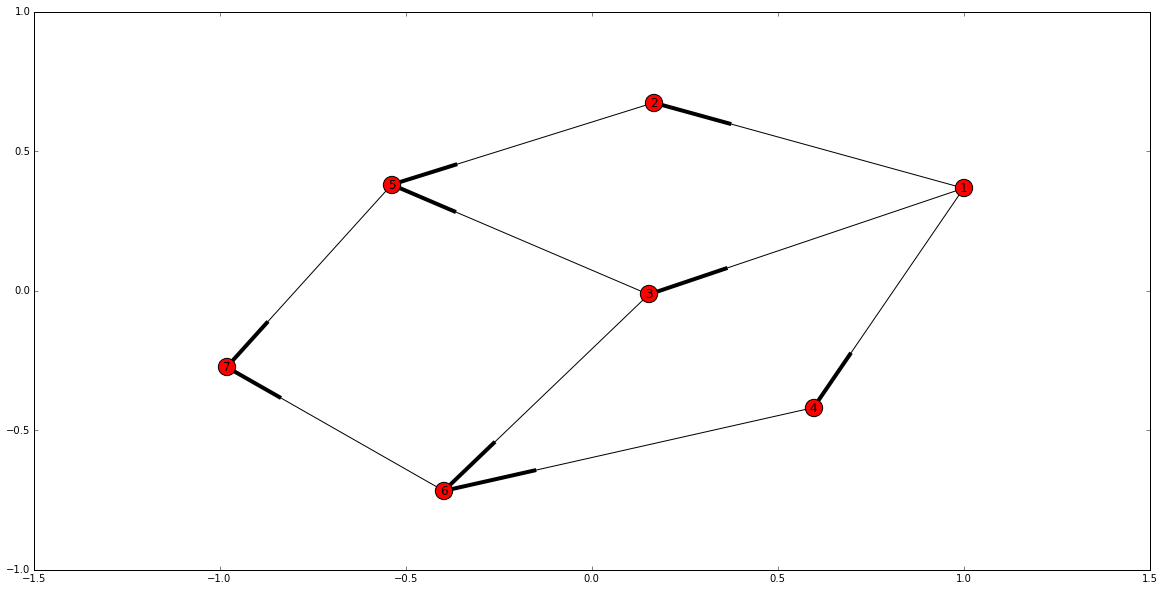

In [8]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G)

In [9]:
flow_value, flow_dict = nx.maximum_flow(G, '1', '7')
flow_value

110.0

In [10]:
cut_value, partition = nx.minimum_cut(G, '1', '7')
reachable, non_reachable = partition
reachable

{'1', '2', '3', '4', '5', '6'}

In [11]:
non_reachable

{'7'}

In [12]:
partition

({'1', '2', '3', '4', '5', '6'}, {'7'})

### This set tells us that the nodes has been partition into two equals sets with s ={1,2,3,4,5,6} and t = {7}

In [13]:
cutset = set()
for u, nbrs in ((n, G[n]) for n in reachable):cutset.update((u, v) for v in nbrs if v in non_reachable)
print(sorted(cutset))
cut_value == sum(G.edge[u][v]['capacity'] for (u, v) in cutset)
cut_value

[('5', '7'), ('6', '7')]


110.0

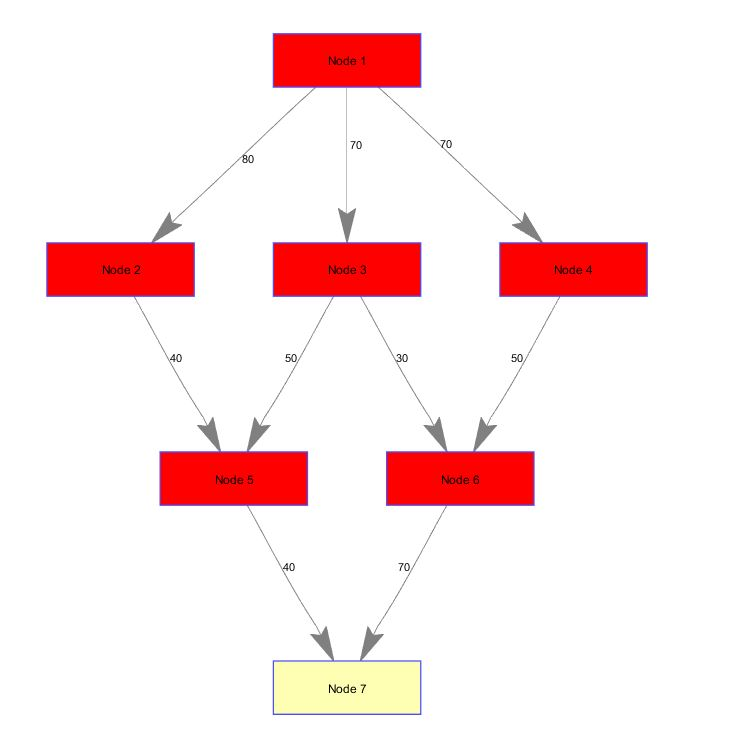

In [14]:
from IPython.display import Image
Image(filename='min-cut.jpeg') 

### Indeed, the sum of the capacities of these edges [('5', '7'), ('6', '7')] is equal to the maximum flow 110.0
### The red nodes and the yellow nodes indicates the partition corresponding to the min-cut

In [16]:
from networkx.algorithms.flow import shortest_augmenting_path

cut_value == nx.minimum_cut(G, '1', '7',flow_func=shortest_augmenting_path)[0]
cut_value

110.0

### Alternative way of doing the same thing but using shortest augmenting path